In [1]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image

Using TensorFlow backend.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [53]:
model = Sequential()
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(26, 200, 200, 1)))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(32, (3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(64, (3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(64, (3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size = (2, 2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 24, 198, 198, 32)  896       
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 24, 99, 99, 32)    0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 22, 97, 97, 32)    27680     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 22, 48, 48, 32)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 20, 46, 46, 64)    55360     
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 20, 23, 23, 64)    0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 18, 21, 21, 64)    110656    
__________

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
def load_img(jpg):
    # imgを渡すとarrayにして返す
    img = image.load_img(jpg, grayscale=True, target_size=(100, 100))
    array = image.img_to_array(img)
    array /= 255.
    return array

In [56]:
def array_concatenate(array0, array1, array2, array3):
    # array4つを渡すと組み合わせる
    array_conc = np.concatenate((np.concatenate((array0, array1)), np.concatenate((array2, array3))), axis=1)
    return array_conc

In [57]:
def array_26_conc(arraylist):
    #arrayのリストを渡すと縦にくっつける
    array26 = np.array(arraylist)
    return array26

In [58]:
list_ = os.listdir("../data/kidney")
jpglist = []
dict = {}
for jpg in list_:
    jpgname = os.path.splitext(jpg)[0]
    jpg = os.path.join("../data/kidney", jpg)
    array = load_img(jpg)
    dict[jpgname] = array

In [59]:
arraylist = []
for i in range(27):
    array0 = dict['R-0-%03d'%i]
    array1 = dict['R-1-%03d'%i]
    array2 = dict['R-2-%03d'%i]
    array3 = dict['R-3-%03d'%i]
    
    array_conc = array_concatenate(array0, array1, array2, array3)
    arraylist.append(array_conc)

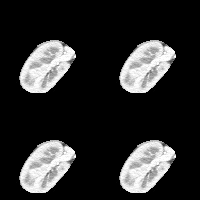

In [60]:
image.array_to_img(arraylist[10])

In [61]:
array26 = array_26_conc(arraylist)

In [64]:
array26.shape

(27, 200, 200, 1)

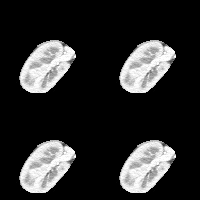

In [65]:
image.array_to_img(array26[10])

In [6]:
img00 = image.load_img('../data/kidney/R-0-000.jpg', grayscale=True, target_size=(100, 100))
x00 = image.img_to_array(img00)
img10 = image.load_img('../data/kidney/R-1-000.jpg', grayscale=True, target_size=(100, 100))
x10 = image.img_to_array(img10)
img20 = image.load_img('../data/kidney/R-2-000.jpg', grayscale=True, target_size=(100, 100))
x20 = image.img_to_array(img20)
img30 = image.load_img('../data/kidney/R-3-000.jpg', grayscale=True, target_size=(100, 100))
x30 = image.img_to_array(img30)

In [7]:
x00x10 = np.concatenate((x00, x10))
x20x30 = np.concatenate((x20, x30))
x = np.concatenate((x00x10, x20x30), axis=1)

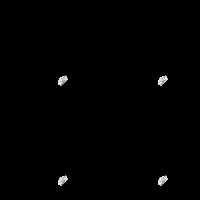

In [8]:
image.array_to_img(x)

In [10]:
img01 = image.load_img('../data/kidney/R-0-001.jpg', grayscale=True, target_size=(100, 100))
x01 = image.img_to_array(img01)
img11 = image.load_img('../data/kidney/R-1-001.jpg', grayscale=True, target_size=(100, 100))
x11 = image.img_to_array(img11)
img21 = image.load_img('../data/kidney/R-2-001.jpg', grayscale=True, target_size=(100, 100))
x21 = image.img_to_array(img21)
img31 = image.load_img('../data/kidney/R-3-001.jpg', grayscale=True, target_size=(100, 100))
x31 = image.img_to_array(img31)

In [12]:
x01x11 = np.concatenate((x01, x11))
x21x31 = np.concatenate((x21, x31))
x1 = np.concatenate((x01x11, x21x31), axis=1)

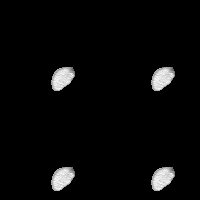

In [13]:
image.array_to_img(x1)

In [14]:
x = np.concatenate((x, x1), axis = 2)

In [16]:
x.shape

(200, 200, 2)